Ce notebook permet de comparer les résultats des algorithmes **CAC**,**CACLA** et **CACLA+VAR** avec une stratégie d'exploration gaussienne et $\epsilon$-greedy sur l'environnement **CartPole Continuous** du papier  https://www.researchgate.net/publication/4249966_Reinforcement_Learning_in_Continuous_Action_Spaces/link/0912f5093a214c7f1b000000/download

Fait par Jérémy DUFOURMANTELLE et Ethan ABITBOL

In [1]:
import matplotlib.pyplot as plt
import torch
import sys
import numpy as np

sys.path.insert(0, '../')
from utils.CartPoleContinuous import ContinuousCartPoleEnv
from utils.Critic import CriticNetwork
from utils.Actor import ActorNetwork
from utils.CAC import CAC
from utils.CACLA import CACLA
from utils.CACLAVAR import CACLAVAR

from tqdm import tqdm

In [4]:
nb_tests_global = 20

# Gaussian Exploration

### CAC with gaussian exploration

In [ ]:
success_cac = 0
fails_cac = 0
nb_tests = nb_tests_global

matrice_simulation_rewards_cac = list()
matrice_simulation_iteration_cac = list()

for i in tqdm(range(nb_tests)) : 
    env = ContinuousCartPoleEnv()
    actor_network = ActorNetwork(
        nb_neurons = 12,
        action_space = env.action_space,
        observation_space = env.observation_space
    )
    critic_network = CriticNetwork(
        nb_neurons = 12,
        observation_space = env.observation_space
    )
    cac = CAC(
        learning_rate_critic = 0.01,
        learning_rate_actor = 0.01,
        discount_factor = 0.9,
        epsilon = 1.0,
        epsilon_min = 0.01,
        epsilon_decay = 0.01,
        sigma = 0.3,
        nb_episode = 5000,
        nb_tests = 3,
        test_frequency = 1,
        env = env,
        actor_network = actor_network,
        critic_network = critic_network,
        exploration_strategy = "gaussian",
        verbose_mode = False
    )
    cac.learning()
    matrice_simulation_rewards_cac.append(cac.list_rewards_mean)
    matrice_simulation_iteration_cac.append(cac.list_iteration)
    
    state = env.reset()
    done = False
    nb_iter = 0
    while not done and nb_iter < env.max_iteration:
        state_t = torch.as_tensor(state , dtype=torch.float32)
        action =  cac.best_model(state_t).detach().numpy()
        new_state, reward, done = env.step(action)
        state = new_state
        nb_iter += 1
    
    if nb_iter == env.max_iteration :
        fails_cac += 1
    else :
        success_cac += 1    

 55%|███████████████████████▋                   | 11/20 [05:40<03:59, 26.66s/it]

In [ ]:
matrice_simulation_iteration_cac = np.array(matrice_simulation_iteration_cac)
print(matrice_simulation_iteration_cac.max())
matrice_simulation_rewards_cac = np.array(matrice_simulation_rewards_cac)
plt.figure(figsize=(10,7))
plt.plot(matrice_simulation_rewards_cac.mean(axis=0))

### CACLA with gaussian exploration

In [8]:
success_cacla = 0
fails_cacla = 0
nb_tests = nb_tests_global

matrice_simulation_rewards_cacla = list()
matrice_simulation_iteration_cacla = list()

for i in tqdm(range(nb_tests)) : 
    env = ContinuousCartPoleEnv()
    actor_network = ActorNetwork(
        nb_neurons = 12,
        action_space = env.action_space,
        observation_space = env.observation_space
    )
    critic_network = CriticNetwork(
        nb_neurons = 12,
        observation_space = env.observation_space
    )
    cacla = CACLA(
        learning_rate_critic = 0.01,
        learning_rate_actor = 0.01,
        discount_factor = 0.8,
        epsilon = 1.0,
        epsilon_min = 0.01,
        epsilon_decay = 0.01,
        sigma = 0.3,
        nb_episode = 5000,
        nb_tests = 3,
        test_frequency = 1,
        env = env,
        actor_network = actor_network,
        critic_network = critic_network,
        exploration_strategy = "gaussian",
        verbose_mode = False
    )
    
    cacla.learning()
    matrice_simulation_rewards_cacla.append(cacla.list_rewards_mean)
    matrice_simulation_iteration_cacla.append(cacla.list_iteration)
    
    state = env.reset()
    done = False
    nb_iter = 0
    while not done and nb_iter < env.max_iteration:
        state_t = torch.as_tensor(state , dtype=torch.float32)
        action =  cacla.best_model(state_t).detach().numpy()
        new_state, reward, done = env.step(action)
        state = new_state
        nb_iter += 1
    
    if nb_iter == env.max_iteration :
        fails_cacla += 1
    else :
        success_cacla += 1    

100%|████████████████████████████████████████| 20/20 [1:49:10<00:00, 327.54s/it]


### CACLA+VAR with gaussian exploration

In [9]:
success_caclavar = 0
fails_caclavar = 0
nb_tests = nb_tests_global

matrice_simulation_rewards_caclavar = list()
matrice_simulation_iteration_caclavar = list()

for i in tqdm(range(nb_tests)) : 
    env = ContinuousCartPoleEnv()
    actor_network = ActorNetwork(
        nb_neurons = 12,
        action_space = env.action_space,
        observation_space = env.observation_space
    )
    critic_network = CriticNetwork(
        nb_neurons = 12,
        observation_space = env.observation_space
    )
    caclavar = CACLAVAR(
        learning_rate_critic = 0.01,
        learning_rate_actor = 0.01,
        discount_factor = 0.95,
        epsilon = 1.0,
        epsilon_min = 0.01,
        epsilon_decay = 0.01,
        sigma = 0.3,
        nb_episode = 5000,
        nb_tests = 3,
        test_frequency = 1,
        env = env,
        actor_network = actor_network,
        critic_network = critic_network,
        exploration_strategy = "gaussian",
        verbose_mode = False
    )
    caclavar.learning()
    matrice_simulation_rewards_caclavar.append(caclavar.list_rewards_mean)
    matrice_simulation_iteration_caclavar.append(caclavar.list_iteration)
    
    state = env.reset()
    done = False
    nb_iter = 0
    while not done and nb_iter < env.max_iteration:
        state_t = torch.as_tensor(state , dtype=torch.float32)
        action =  caclavar.best_model(state_t).detach().numpy()
        new_state, reward, done = env.step(action)
        state = new_state
        nb_iter += 1
    
    if nb_iter == env.max_iteration :
        fails_caclavar += 1
    else :
        success_caclavar += 1    

100%|████████████████████████████████████████| 20/20 [1:38:24<00:00, 295.24s/it]


In [10]:
print(f"[gaussian] Nombre de tests : {nb_tests}")
print("------------------------------------")
print(f"[gaussian] Nombre de succes CAC: {success_cac}")
print(f"[gaussian] Nombre d'echecs CAC: {fails_cac}")
print(f"[gaussian] Ratio de succes pour CAC: {success_cac/(success_cac+fails_cac)*100}%")
print("------------------------------------")
print(f"[gaussian] Nombre de succes CACLA: {success_cacla}")
print(f"[gaussian] Nombre d'echecs CACLA: {fails_cacla}")
print(f"[gaussian] Ratio de succes pour CACLA: {success_cacla/(success_cacla+fails_cacla)*100}%")
print("------------------------------------")
print(f"[gaussian] Nombre de succes CACLAVAR: {success_caclavar}")
print(f"[gaussian] Nombre d'echecs CACLAVAR: {fails_caclavar}")
print(f"[gaussian] Ratio de succes pour CACLAVAR: {success_caclavar/(success_caclavar+fails_caclavar)*100}%")

[gaussian] Nombre de tests : 20
------------------------------------
[gaussian] Nombre de succes CAC: 20
[gaussian] Nombre d'echecs CAC: 0
[gaussian] Ratio de succes pour CAC: 100.0%
------------------------------------
[gaussian] Nombre de succes CACLA: 11
[gaussian] Nombre d'echecs CACLA: 9
[gaussian] Ratio de succes pour CACLA: 55.00000000000001%
------------------------------------
[gaussian] Nombre de succes CACLAVAR: 2
[gaussian] Nombre d'echecs CACLAVAR: 18
[gaussian] Ratio de succes pour CACLAVAR: 10.0%


In [11]:
def rewards_normalization(matrice_simulation_rewards) :
    dist_max = -200
    dist_min = 0
    arr = np.array(matrice_simulation_rewards)
    # return 1 - ( arr / (dist_max - dist_min)).mean(axis=0)
    return arr.mean(axis=0)

In [12]:
l_cac = rewards_normalization(matrice_simulation_rewards_cac)
l_cacla = rewards_normalization(matrice_simulation_rewards_cacla)
l_caclavar = rewards_normalization(matrice_simulation_rewards_caclavar)

In [13]:
m_iter_caclavar = np.array(matrice_simulation_iteration_caclavar)
x_iter_caclavar = m_iter_caclavar.mean(axis=0)

m_iter_cacla = np.array(matrice_simulation_iteration_cacla)
x_iter_cacla = m_iter_cacla.mean(axis=0)

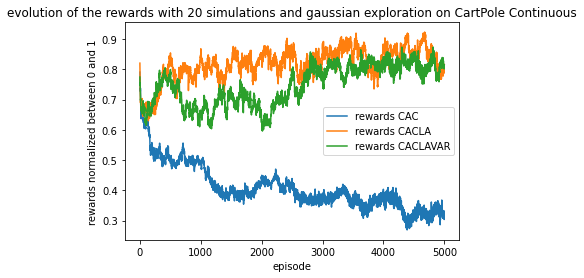

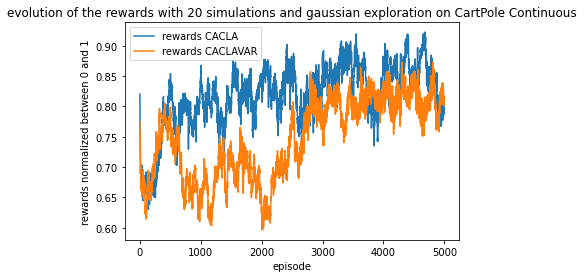

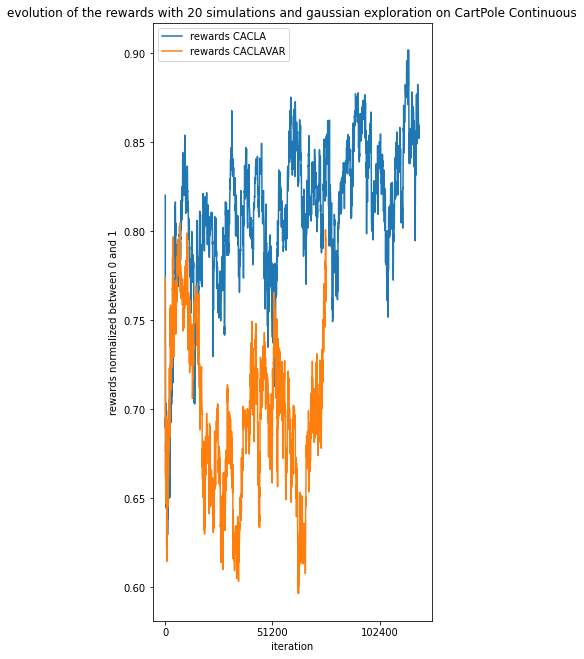

In [14]:
plt.figure()
plt.title(f"evolution of the rewards with {nb_tests} simulations and gaussian exploration on CartPole Continuous")
plt.xlabel("episode")
plt.ylabel("rewards normalized between 0 and 1")
plt.plot(l_cac, label="rewards CAC")
plt.plot(l_cacla, label="rewards CACLA")
plt.plot(l_caclavar, label="rewards CACLAVAR")
plt.legend()
plt.show()

plt.figure()
plt.title(f"evolution of the rewards with {nb_tests} simulations and gaussian exploration on CartPole Continuous")
plt.xlabel("episode")
plt.ylabel("rewards normalized between 0 and 1")
plt.plot(l_cacla, label="rewards CACLA")
plt.plot(l_caclavar, label="rewards CACLAVAR")
plt.legend()
plt.show()

plt.figure(figsize=(5,11))
plt.title(f"evolution of the rewards with {nb_tests} simulations and gaussian exploration on CartPole Continuous")
plt.xlabel("iteration")
plt.ylabel("rewards normalized between 0 and 1")
plt.plot(x_iter_cacla[:int(len(x_iter_cacla)/2)],l_cacla[:int(len(x_iter_cacla)/2)], label="rewards CACLA")
plt.plot(x_iter_caclavar[:int(len(x_iter_caclavar)/2)],l_caclavar[:int(len(x_iter_caclavar)/2)], label="rewards CACLAVAR")
plt.xticks([0,51200,102400])
plt.legend()
plt.show()

In [15]:
print("Resultats : ")
print("[gaussian] CAC : mean rewards -> ",l_cac.mean())
print("[gaussian] CAC : std rewards -> ",l_cac.std())
print("[gaussian] CACLA : mean rewards -> ",l_cacla.mean())
print("[gaussian] CACLA : std rewards -> ",l_cacla.std())
print("[gaussian] CACLAVAR : mean rewards -> ",l_caclavar.mean())
print("[gaussian] CACLAVAR : std rewards -> ",l_caclavar.std())

Resultats : 
[gaussian] CAC : mean rewards ->  0.408136043396262
[gaussian] CAC : std rewards ->  0.0736612548617254
[gaussian] CACLA : mean rewards ->  0.8169910775078867
[gaussian] CACLA : std rewards ->  0.052893774023928704
[gaussian] CACLAVAR : mean rewards ->  0.7469693029268306
[gaussian] CACLAVAR : std rewards ->  0.0662362643481624


# $\epsilon$-greedy Exploration

### CAC with $\epsilon$-greedy exploration

In [3]:
success_cac = 0
fails_cac = 0
nb_tests = nb_tests_global

matrice_simulation_rewards_cac = list()
matrice_simulation_iteration_cac = list()

for i in tqdm(range(nb_tests)) : 
    env = ContinuousCartPoleEnv()
    actor_network = ActorNetwork(
        nb_neurons = 12,
        action_space = env.action_space,
        observation_space = env.observation_space
    )
    critic_network = CriticNetwork(
        nb_neurons = 12,
        observation_space = env.observation_space
    )
    cac = CAC(
        learning_rate_critic = 0.01,
        learning_rate_actor = 0.01,
        discount_factor = 0.9,
        epsilon = 1.0,
        epsilon_min = 0.01,
        epsilon_decay = 0.01,
        sigma = 0.3,
        nb_episode = 50000,
        nb_tests = 3,
        test_frequency = 1,
        env = env,
        actor_network = actor_network,
        critic_network = critic_network,
        exploration_strategy = "egreedy",
        verbose_mode = False
    )
    cac.learning()
    matrice_simulation_rewards_cac.append(cac.list_rewards_mean)
    matrice_simulation_iteration_cac.append(cac.list_iteration)
    
    state = env.reset()
    done = False
    nb_iter = 0
    while not done and nb_iter < env.max_iteration:
        state_t = torch.as_tensor(state , dtype=torch.float32)
        action =  cac.best_model(state_t).detach().numpy()
        new_state, reward, done = env.step(action)
        state = new_state
        nb_iter += 1
    
    if nb_iter == env.max_iteration :
        fails_cac += 1
    else :
        success_cac += 1    

100%|████████████████████████████████████████| 20/20 [1:23:53<00:00, 251.68s/it]


### CACLA with $\epsilon$-greedy exploration

In [4]:
success_cacla = 0
fails_cacla = 0
nb_tests = nb_tests_global

matrice_simulation_rewards_cacla = list()
matrice_simulation_iteration_cacla = list()

for i in tqdm(range(nb_tests)) : 
    env = ContinuousCartPoleEnv()
    actor_network = ActorNetwork(
        nb_neurons = 12,
        action_space = env.action_space,
        observation_space = env.observation_space
    )
    critic_network = CriticNetwork(
        nb_neurons = 12,
        observation_space = env.observation_space
    )
    cacla = CACLA(
        learning_rate_critic = 0.01,
        learning_rate_actor = 0.01,
        discount_factor = 0.95,
        epsilon = 1.0,
        epsilon_min = 0.01,
        epsilon_decay = 0.01,
        sigma = 0.3,
        nb_episode = 50000,
        nb_tests = 3,
        test_frequency = 1,
        env = env,
        actor_network = actor_network,
        critic_network = critic_network,
        exploration_strategy = "egreedy",
        verbose_mode = False
    )
    cacla.learning()
    matrice_simulation_rewards_cacla.append(cacla.list_rewards_mean)
    matrice_simulation_iteration_cacla.append(cacla.list_iteration)
    
    state = env.reset()
    done = False
    nb_iter = 0
    while not done and nb_iter < env.max_iteration:
        state_t = torch.as_tensor(state , dtype=torch.float32)
        action =  cacla.best_model(state_t).detach().numpy()
        new_state, reward, done = env.step(action)
        state = new_state
        nb_iter += 1
    
    if nb_iter == env.max_iteration :
        fails_cacla += 1
    else :
        success_cacla += 1    

100%|████████████████████████████████████████| 20/20 [3:28:54<00:00, 626.73s/it]


### CACLA+VAR with $\epsilon$-greedy exploration

In [5]:
success_caclavar = 0
fails_caclavar = 0
nb_tests = nb_tests_global

matrice_simulation_rewards_caclavar = list()
matrice_simulation_iteration_caclavar = list()

for i in tqdm(range(nb_tests)) : 
    env = ContinuousCartPoleEnv()
    actor_network = ActorNetwork(
        nb_neurons = 12,
        action_space = env.action_space,
        observation_space = env.observation_space
    )
    critic_network = CriticNetwork(
        nb_neurons = 12,
        observation_space = env.observation_space
    )
    caclavar = CACLAVAR(
        learning_rate_critic = 0.01,
        learning_rate_actor = 0.01,
        discount_factor = 0.99,
        epsilon = 1.0,
        epsilon_min = 0.01,
        epsilon_decay = 0.01,
        sigma = 0.3,
        nb_episode = 50000,
        nb_tests = 3,
        test_frequency = 1,
        env = env,
        actor_network = actor_network,
        critic_network = critic_network,
        exploration_strategy = "egreedy",
        verbose_mode = False
    )
    caclavar.learning()
    matrice_simulation_rewards_caclavar.append(caclavar.list_rewards_mean)
    matrice_simulation_iteration_caclavar.append(caclavar.list_iteration)
    
    state = env.reset()
    done = False
    nb_iter = 0
    while not done and nb_iter < env.max_iteration:
        state_t = torch.as_tensor(state , dtype=torch.float32)
        action =  caclavar.best_model(state_t).detach().numpy()
        new_state, reward, done = env.step(action)
        state = new_state
        nb_iter += 1
    
    if nb_iter == env.max_iteration :
        fails_caclavar += 1
    else :
        success_caclavar += 1    

100%|████████████████████████████████████████| 20/20 [2:27:57<00:00, 443.90s/it]


In [6]:
print(f"[egreedy] Nombre de tests : {nb_tests}")
print("------------------------------------")
print(f"[egreedy] Nombre de succes CAC: {success_cac}")
print(f"[egreedy] Nombre d'echecs CAC: {fails_cac}")
print(f"[egreedy] Ratio de succes pour CAC: {success_cac/(success_cac+fails_cac)*100}%")
print("------------------------------------")
print(f"[egreedy] Nombre de succes CACLA: {success_cacla}")
print(f"[egreedy] Nombre d'echecs CACLA: {fails_cacla}")
print(f"[egreedy] Ratio de succes pour CACLA: {success_cacla/(success_cacla+fails_cacla)*100}%")
print("------------------------------------")
print(f"[egreedy] Nombre de succes CACLAVAR: {success_caclavar}")
print(f"[egreedy] Nombre d'echecs CACLAVAR: {fails_caclavar}")
print(f"[egreedy] Ratio de succes pour CACLAVAR: {success_caclavar/(success_caclavar+fails_caclavar)*100}%")

[egreedy] Nombre de tests : 20
------------------------------------
[egreedy] Nombre de succes CAC: 19
[egreedy] Nombre d'echecs CAC: 1
[egreedy] Ratio de succes pour CAC: 95.0%
------------------------------------
[egreedy] Nombre de succes CACLA: 10
[egreedy] Nombre d'echecs CACLA: 10
[egreedy] Ratio de succes pour CACLA: 50.0%
------------------------------------
[egreedy] Nombre de succes CACLAVAR: 15
[egreedy] Nombre d'echecs CACLAVAR: 5
[egreedy] Ratio de succes pour CACLAVAR: 75.0%


In [7]:
def rewards_normalization(matrice_simulation_rewards) :
    dist_max = -200
    dist_min = 0
    arr = np.array(matrice_simulation_rewards)
    # return 1 - ( arr / (dist_max - dist_min)).mean(axis=0)
    return arr.mean(axis=0)

In [8]:
l_cac = rewards_normalization(matrice_simulation_rewards_cac)
l_cacla = rewards_normalization(matrice_simulation_rewards_cacla)
l_caclavar = rewards_normalization(matrice_simulation_rewards_caclavar)

In [9]:
m_iter_caclavar = np.array(matrice_simulation_iteration_caclavar)
x_iter_caclavar = m_iter_caclavar.mean(axis=0)

m_iter_cacla = np.array(matrice_simulation_iteration_cacla)
x_iter_cacla = m_iter_cacla.mean(axis=0)

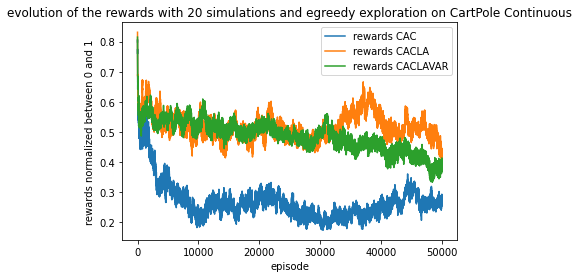

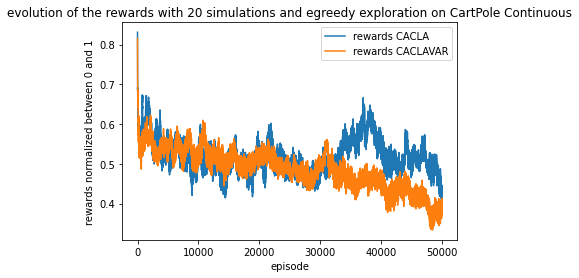

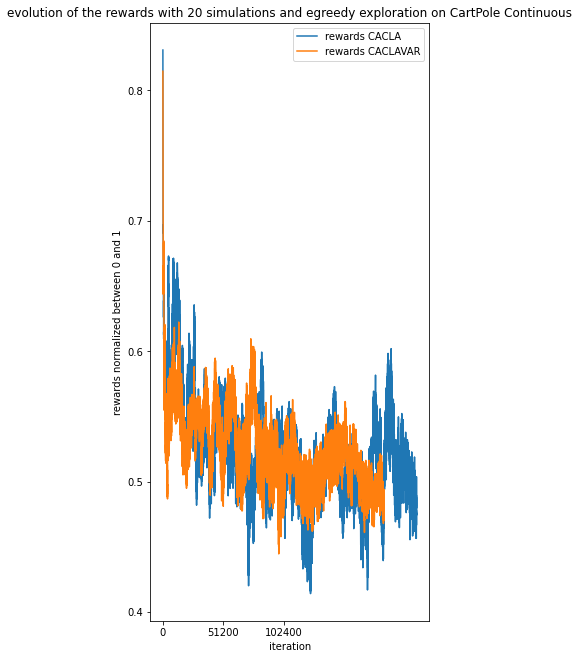

In [10]:
plt.figure()
plt.title(f"evolution of the rewards with {nb_tests} simulations and egreedy exploration on CartPole Continuous")
plt.xlabel("episode")
plt.ylabel("rewards normalized between 0 and 1")
plt.plot(l_cac, label="rewards CAC")
plt.plot(l_cacla, label="rewards CACLA")
plt.plot(l_caclavar, label="rewards CACLAVAR")
plt.legend()
plt.show()

plt.figure()
plt.title(f"evolution of the rewards with {nb_tests} simulations and egreedy exploration on CartPole Continuous")
plt.xlabel("episode")
plt.ylabel("rewards normalized between 0 and 1")
plt.plot(l_cacla, label="rewards CACLA")
plt.plot(l_caclavar, label="rewards CACLAVAR")
plt.legend()
plt.show()

plt.figure(figsize=(5,11))
plt.title(f"evolution of the rewards with {nb_tests} simulations and egreedy exploration on CartPole Continuous")
plt.xlabel("iteration")
plt.ylabel("rewards normalized between 0 and 1")
plt.plot(x_iter_cacla[:int(len(x_iter_cacla)/2)],l_cacla[:int(len(x_iter_cacla)/2)], label="rewards CACLA")
plt.plot(x_iter_caclavar[:int(len(x_iter_caclavar)/2)],l_caclavar[:int(len(x_iter_caclavar)/2)], label="rewards CACLAVAR")
plt.xticks([0,51200,102400])
plt.legend()
plt.show()

In [11]:
print("Resultats : ")
print("[egreedy] CAC : mean rewards -> ",l_cac.mean())
print("[egreedy] CAC : std rewards -> ",l_cac.std())
print("[egreedy] CACLA : mean rewards -> ",l_cacla.mean())
print("[egreedy] CACLA : std rewards -> ",l_cacla.std())
print("[egreedy] CACLAVAR : mean rewards -> ",l_caclavar.mean())
print("[egreedy] CACLAVAR : std rewards -> ",l_caclavar.std())

Resultats : 
[egreedy] CAC : mean rewards ->  0.2693965556224772
[egreedy] CAC : std rewards ->  0.06332231659486495
[egreedy] CACLA : mean rewards ->  0.5184571144798223
[egreedy] CACLA : std rewards ->  0.04174547549648922
[egreedy] CACLAVAR : mean rewards ->  0.48727700158734233
[egreedy] CACLAVAR : std rewards ->  0.049548303670504834
